## Covid-19 Outbreak Prediction
This experiment has been done to predict confirmed cases and number of deaths using two models- polynomial and SVM.
For this project, the latest dataset operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) has been used. Url-https://github.com/CSSEGISandData/COVID-19


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

## Input datasets
At the first step, here confirmed cases, deaths and latest datasets are being imported.


In [4]:

confirmed_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613


In [6]:
#exporting confirmed cases dataset(CSV file) into confirmed_cases
deaths_reported=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [7]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2244,2244,2253,2257,2264,2277,2288,2301,2301,2314
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1210,1217,1223,1230,1233,1241,1247,1252,1256,1261
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2782,2786,2792,2798,2803,2807,2812,2816,2819,2822
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,84,84,84,84,85,85,85,86,87,88
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,410,413,413,415,416,416,420,422,424,425


In [8]:
recovered_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [9]:
#Exporting lastest covid-19 data by country/region and date
latest_data=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-23-2020.csv')

In [ ]:
latest_data.describe()

In [19]:


latest_data.isna().sum()

FIPS                   713
Admin2                 708
Province_State         170
Country_Region           0
Last_Update              0
Lat                     86
Long_                   86
Confirmed                0
Deaths                   0
Recovered                0
Active                   3
Combined_Key             0
Incident_Rate           86
Case_Fatality_Ratio     43
dtype: int64

In [8]:
#Fetching all the columns from Confirmed_cases
cols=deaths_reported.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '1/4/21', '1/5/21', '1/6/21', '1/7/21', '1/8/21', '1/9/21', '1/10/21',
       '1/11/21', '1/12/21', '1/13/21'],
      dtype='object', length=362)

In [9]:
#Extracting the date columns
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths =  deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries =  recovered_cases.loc[:,cols[4]:cols[-1]]

## EDA
In following steps, basic EDA has been performed to see different covid-19 situations for 5 selected countries

In [10]:
#declaring empty vectors for further data exploration for 5 countries

dates= confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
recovery_rate=[]
total_recovery=[]
total_active =[]


bangladesh_cases=[]
china_cases=[]
malaysia_cases=[]
india_cases=[]
us_cases=[]

bangladesh_deaths=[]
china_deaths=[]
malaysia_deaths=[]
india_deaths=[]
us_deaths=[]

bangladesh_recovered=[]
china_recovered=[]
malaysia_recovered=[]
india_recovered=[]
us_recovered=[]


In [11]:
#EDA for China, Bangladesh, Malaysia, US and India

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovery.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    bangladesh_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Bangladesh'][i].sum())
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    malaysia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Malaysia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    
    bangladesh_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Bangladesh'][i].sum())
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    malaysia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Malaysia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    
    bangladesh_recovered.append(recovered_cases[recovered_cases['Country/Region']=='Bangladesh'][i].sum())
    china_recovered.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    malaysia_recovered.append(recovered_cases[recovered_cases['Country/Region']=='Malaysia'][i].sum())
    india_recovered.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())
    us_recovered.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())

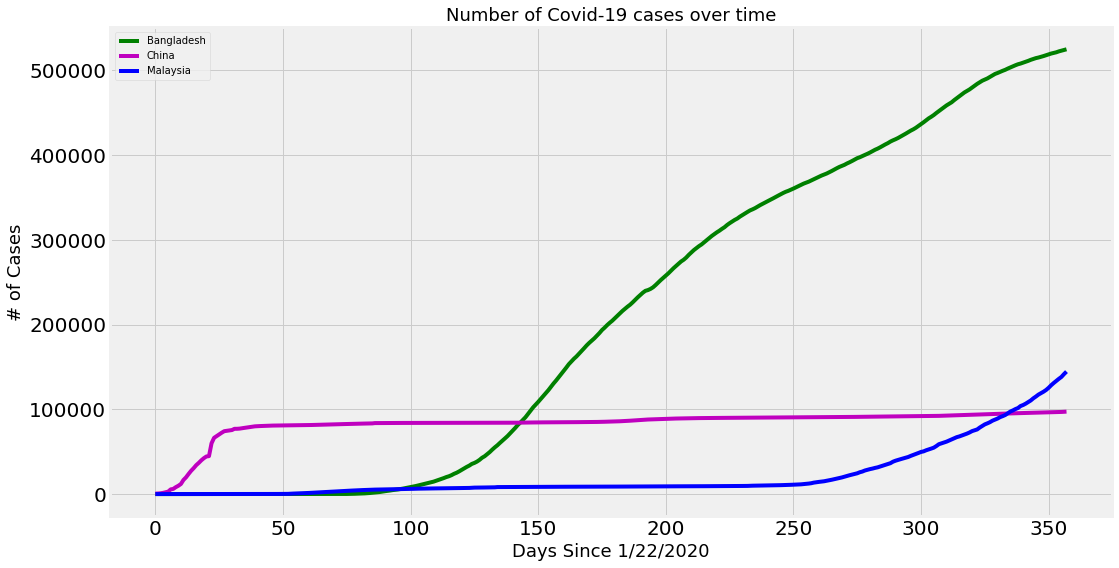

In [47]:
#Plotting confirmed cases for Bangladesh, Malaysia, China in line chart  by dates
plt.figure(figsize=(16,9))


plt.plot(adjusted_dates,bangladesh_cases,color='g')
plt.plot(adjusted_dates,china_cases,color='m')
plt.plot(adjusted_dates,malaysia_cases,color='b')


plt.title('Number of Covid-19 cases over time',size=18)
plt.xlabel('Days Since 1/22/2020', size=18)
plt.ylabel('# of Cases', size=18)
plt.legend(['Bangladesh','China','Malaysia'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

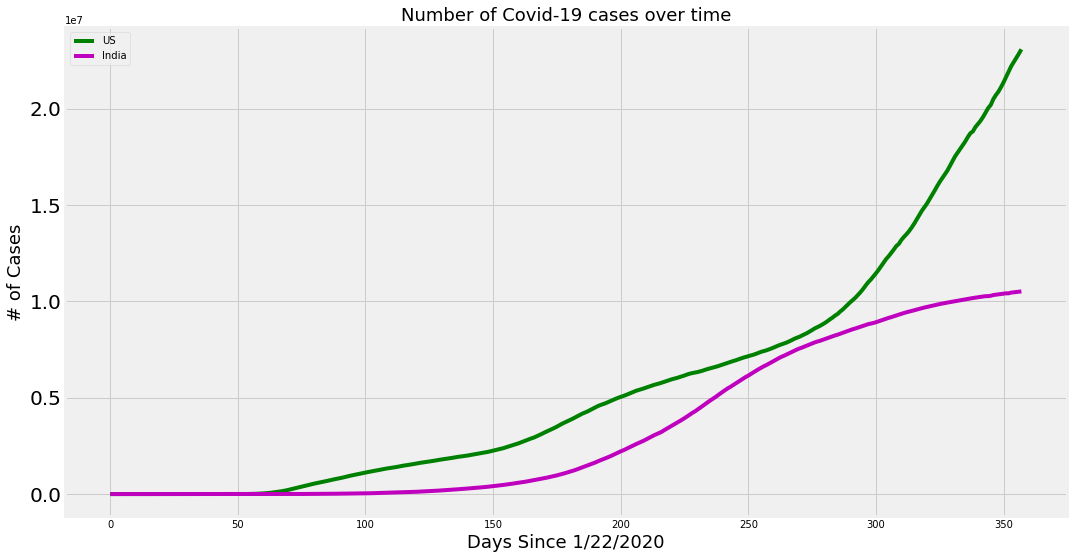

In [49]:
#Plotting confirmed cases for US and India in line chart  by dates
plt.figure(figsize=(16,9))


plt.plot(adjusted_dates,us_cases,color='g')
plt.plot(adjusted_dates,india_cases,color='m')


plt.title('Number of Covid-19 cases over time',size=18)
plt.xlabel('Days Since 1/22/2020', size=18)
plt.ylabel('# of Cases', size=18)
plt.legend(['US','India','Malaysia'])
plt.yticks(size=20)
plt.show()

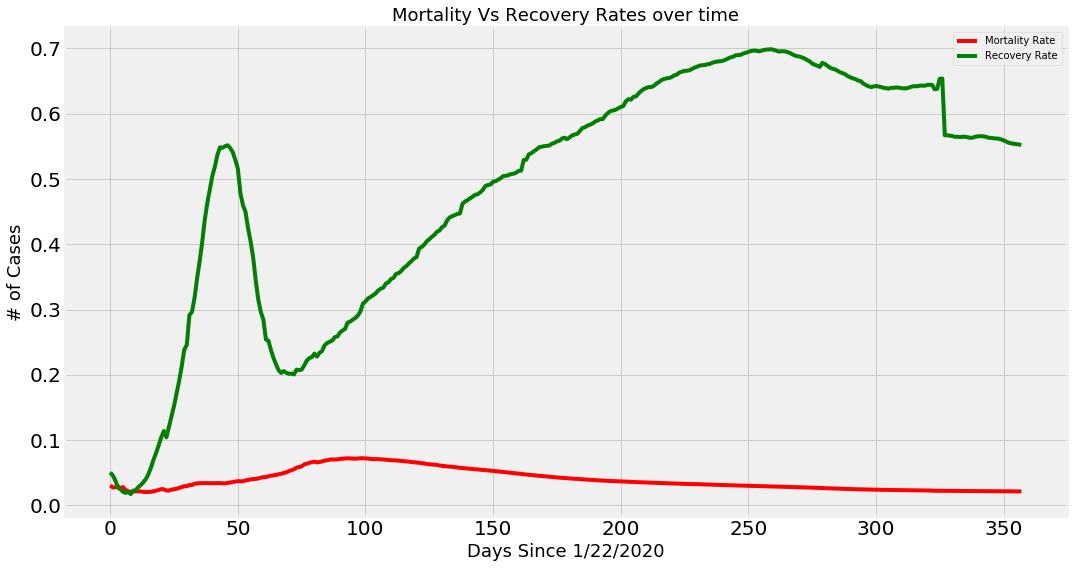

In [36]:
#Plotting Mortality & Recovery Rates line chart  by dates
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,mortality_rate,color='r')
plt.plot(adjusted_dates,recovery_rate,color='g')
plt.title('Mortality Vs Recovery Rates over time',size=18)
plt.xlabel('Days Since 1/22/2020', size=18)
plt.ylabel('# of Cases', size=18)
plt.legend(['Mortality Rate', 'Recovery Rate'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

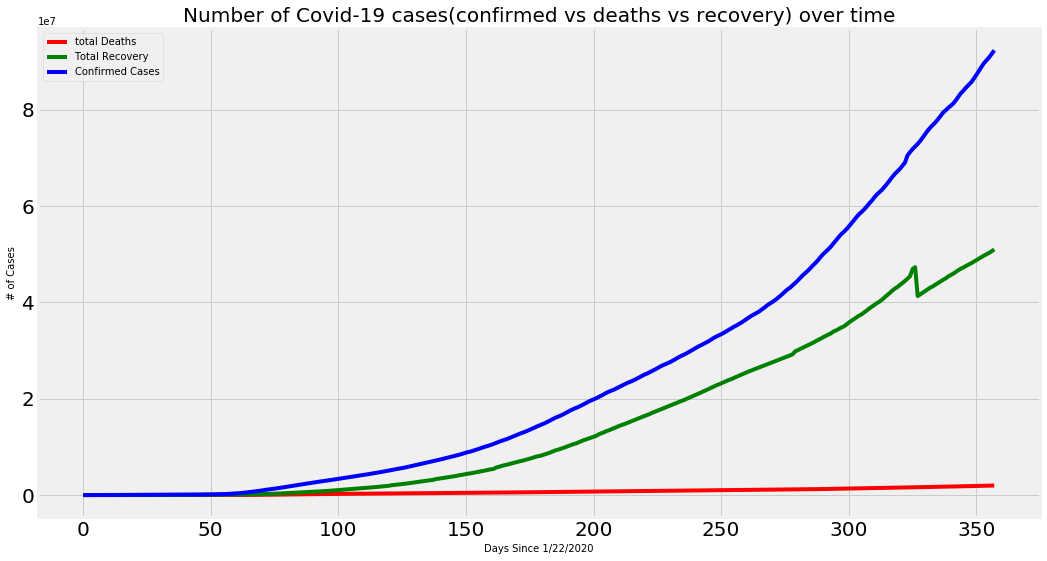

In [20]:
#Plotting confirmed vs deaths vs recovery by dates
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates,total_deaths, color='r')
plt.plot(adjusted_dates,total_recovery, color='g')
plt.plot(adjusted_dates,world_cases,color='b')
plt.title('Number of Covid-19 cases(confirmed vs deaths vs recovery) over time',size=20)
plt.xlabel('Days Since 1/22/2020', size=10)
plt.ylabel('# of Cases', size=10)
plt.legend(['total Deaths','Total Recovery','Confirmed Cases'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Step-3 Start Buidling Models
In this step, dates are being adjusted for which prediction will be made from the start date. Since prediction will be for 30 days, thus adding this 30 dates to the list of datesAnd reshaped the world cases to fit in the model.

In [51]:
# converting dates into array
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovery=np.array(total_recovery).reshape(-1,1)

In [52]:
# since prediction will be for 30 days, thus adding this 30 dates to the list of dates
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-30]


In [27]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [53]:
# Converting integers to Date format
start = '01/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates= []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [59]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

### Split data into training and testing datasets.
Here we have assigned 75% of the dataset for training and 25% for testing.

In [54]:
#Splitting data into training=75% and test
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25,shuffle=False)

## Building Models for confirmed cases prediction
In this step, two models 1. Polynomial and 2.SVM -are being built to see prediction for confirmed cases and number of death

### 1. Confirmed Cases prediction with Polynomial Regression Model

In [55]:
#transform data for polynomial regression

poly=PolynomialFeatures(degree=3)
poly_X_train_confirmed=poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed=poly.fit_transform(X_test_confirmed)
poly_future_forecast =  poly.fit_transform(future_forecast)

In [56]:
# Modeling polynomial regression

linear_model=LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred=linear_model.predict(poly_X_test_confirmed)
linear_pred=linear_model.predict(poly_future_forecast)

#### Polynomial Regression Model Evaluation

In [57]:
#Calculate MAE and MSE
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 5965791.891618436
MSE: 53441280372402.6


In [58]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(y_test_confirmed,test_linear_pred)
print(LR_MAPE)

8.164181442794098


In [68]:
r2=r2_score(y_test_confirmed, test_linear_pred)
print(r2)

0.7857954955821307


#### Ploting Test and predicted data from Polynomial regression model.

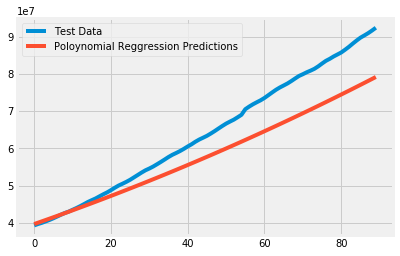

In [59]:
#Plotting test data vs Polynomial predicted data
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data','Poloynomial Reggression Predictions'])

### 2. Confirmed cases prediction with SVM

In [60]:
#svn_confirmed cases for next 30 Days = svm_search.best_estimator

svm_confirmed= SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5,C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred=svm_confirmed.predict(future_forecast)

C:\Users\iPric\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Plotting test and predicted data using SVM Model

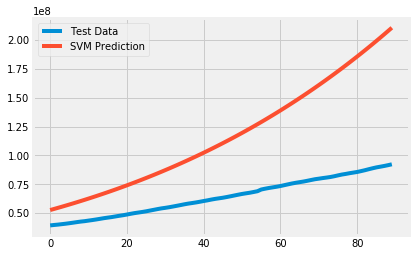

In [61]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Prediction'])

#### SVM Model Evaluation

In [73]:
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))

MAE: 51734104.92227845
MSE: 3554471293232899.0


In [107]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(y_test_confirmed,svm_test_pred)
print(LR_MAPE)

92.91745522786275


In [67]:
r2=r2_score(y_test_confirmed, svm_test_pred)
print(r2)

-14.015942107121802


#### Creating an user defined function to plot actual Vs inal prediected results according to the given parameter

In [38]:
adjusted_dates=adjusted_dates.reshape(1,-1)[0]

In [109]:
def plot_predictions(x,y,pred,algo_name,color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast,pred,linestyle='dashed',color=color)
    plt.title('Number of Covid-19 cases over time',size=18)
    plt.xlabel('Days Since 1/22/2020', size=18)
    plt.ylabel('# of Cases', size=18)
    plt.legend(['Confirmed Cases',algo_name], prop={'size':20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

### Final output: Polynomial regression
#### Plotting confirmed cases vs prediction for next 30 days

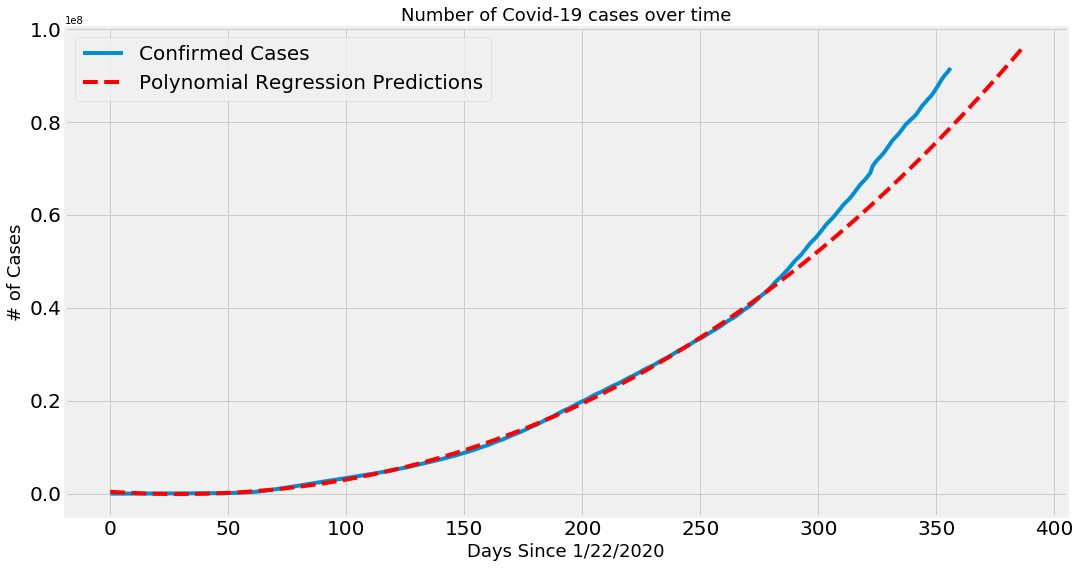

In [44]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions','red')

### Final output: SVM
#### Plotting Confirmed cases vs prediction for next 30 days

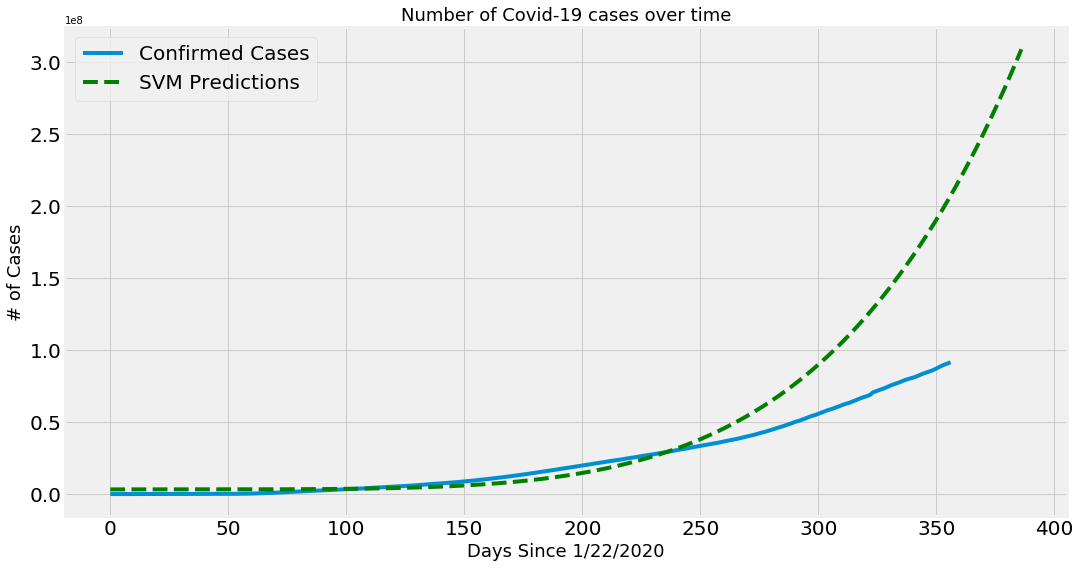

In [110]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions','green')

#### Futture Confirmed Cases Prediction into DataFrame: Polynomial and SVM

In [64]:
#Future Prediction using polynomial regression into dataframe
linear_pred=linear_pred.reshape(1, -1)[0]
poly_df=pd.DataFrame({'Date':future_forecast_dates[-30:],'Predicted number of confirmed cases worldWide':np.round(linear_pred[-30:])})
poly_df

,Date,Predicted number of confirmed cases worldWide
0,01/13/2021,1282517.0
1,01/14/2021,1282264.0
2,01/15/2021,1281945.0
3,01/16/2021,1281558.0
4,01/17/2021,1281104.0
5,01/18/2021,1280581.0
6,01/19/2021,1279989.0
7,01/20/2021,1279329.0
8,01/21/2021,1278599.0
9,01/22/2021,1277799.0


In [ ]:
#Future Prediction using SVM
svm_df=pd.DataFrame({'Date':future_forecast_dates[-30:],'SVM Predicted number of confirmed cases worldWide':np.round(svm_pred[-30:])})
svm_df

def mean_absolute_percentage_error(y_true, y_pred): 
    df_predicted = pd.DataFrame(y_pred,columns=['y_pred'])
    df_predicted['y_actual']=y_true
    #df_predicted.head()
    df_predicted['error']= np.abs(df_predicted['y_actual']-df_predicted['y_pred'])
    df_predicted['pct_error']=df_predicted['error']/df_predicted['y_actual']
    
    abc = (df_predicted['pct_error'].mean())*100

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return round(abc,2)

In [23]:
future_forecast_dates

['01/01/2020',
 '01/02/2020',
 '01/03/2020',
 '01/04/2020',
 '01/05/2020',
 '01/06/2020',
 '01/07/2020',
 '01/08/2020',
 '01/09/2020',
 '01/10/2020',
 '01/11/2020',
 '01/12/2020',
 '01/13/2020',
 '01/14/2020',
 '01/15/2020',
 '01/16/2020',
 '01/17/2020',
 '01/18/2020',
 '01/19/2020',
 '01/20/2020',
 '01/21/2020',
 '01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/20

## Building Models for death prediction
In this step, two models 1. Polynomial and 2.SVM -are being built to see prediction for number of deaths.

In [69]:
#Splitting data into training=75% and test for Predicting Deaths 
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.25,shuffle=False)

### 1. Death prediction with Polynomial Regression Model

In [70]:
#transform data for polynomial regression to predict deaths

poly=PolynomialFeatures(degree=3)
poly_X_train_deaths=poly.fit_transform(X_train_deaths)
poly_X_test_deaths=poly.fit_transform(X_test_deaths)
poly_future_forecast =  poly.fit_transform(future_forecast)

In [71]:
#polynomial regression to predict deaths

linear_model=LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_deaths, y_train_deaths)
test_linear_pred=linear_model.predict(poly_X_test_deaths)
linear_pred_death=linear_model.predict(poly_future_forecast)

### Polynomial regression evaluation for death prediction

In [72]:
print('MAE:', mean_absolute_error(test_linear_pred, y_test_deaths))
print('MSE:', mean_squared_error(test_linear_pred, y_test_deaths))

MAE: 271090.6697476223
MSE: 114255509000.87125


In [73]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(y_test_deaths,test_linear_pred)
print(LR_MAPE)

16.398601497751876


In [75]:
r2=r2_score(y_test_deaths, test_linear_pred)
print(r2)

-0.6793161433663191


### Plotting Polynomial regression for test vs predicted data

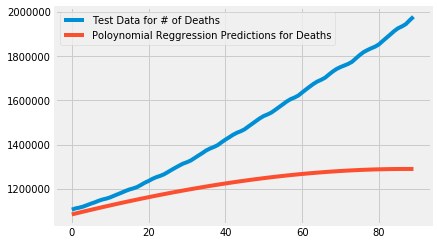

In [74]:
plt.plot(y_test_deaths)
plt.plot(test_linear_pred)
plt.legend(['Test Data for # of Deaths','Poloynomial Reggression Predictions for Deaths'])

### 1. Death prediction with SVM

In [76]:
#svm_deaths = svm_search.best_estimatoro

svm_deaths= SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5,C=0.1)
svm_deaths.fit(X_train_deaths, y_train_deaths)
svm_pred_death=svm_deaths.predict(future_forecast)

C:\Users\iPric\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plotting SVM for test vs predicted data for number of deaths

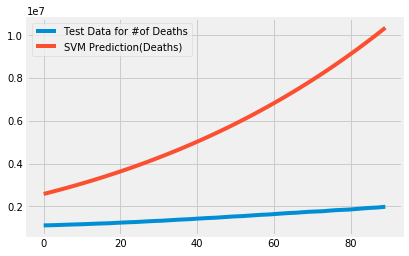

In [77]:
svm_test_pred = svm_deaths.predict(X_test_deaths)
plt.plot(y_test_deaths)
plt.plot(svm_test_pred)
plt.legend(['Test Data for #of Deaths', 'SVM Prediction(Deaths)'])


### SVM evaluation for death prediction 

In [78]:
print('MAE:', mean_absolute_error(svm_test_pred, y_test_deaths))
print('MSE:', mean_squared_error(svm_test_pred, y_test_deaths))

MAE: 4268945.636868819
MSE: 22227981242771.63


In [79]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(y_test_deaths,svm_test_pred)
print(LR_MAPE)

298.6293605859902


In [80]:
r2=r2_score(y_test_deaths, svm_test_pred)
print(r2)

-325.70466450020797


#### Creating an user defined function to plot actual Vs final prediected results according to the given parameter

In [58]:
#Defining function to plot prediction Vs real data

def plot_predictions_deaths(x,y,pred,algo_name,color):
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.plot(future_forecast,pred,linestyle='dashed',color=color)
    plt.title('Number of Covid-19 deaths over time',size=18)
    plt.xlabel('Days Since 1/22/2020', size=18)
    plt.ylabel('# of Cases', size=18)
    plt.legend(['# of Deaths',algo_name], prop={'size':20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.show()

### Final output: Polynomial regression
#### Plotting #of Deaths vs prediction for next 30 days

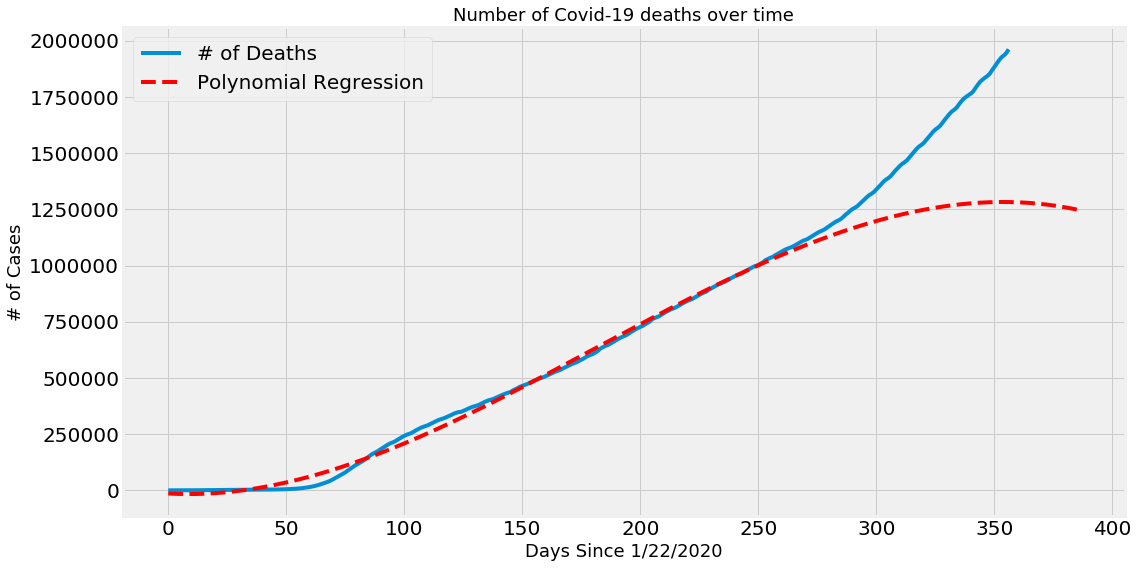

In [59]:
plot_predictions_deaths(adjusted_dates,total_deaths, linear_pred_death, 'Polynomial Regression','red')

### Final output: SVM
#### Plotting #of Deaths vs prediction for next 30 days

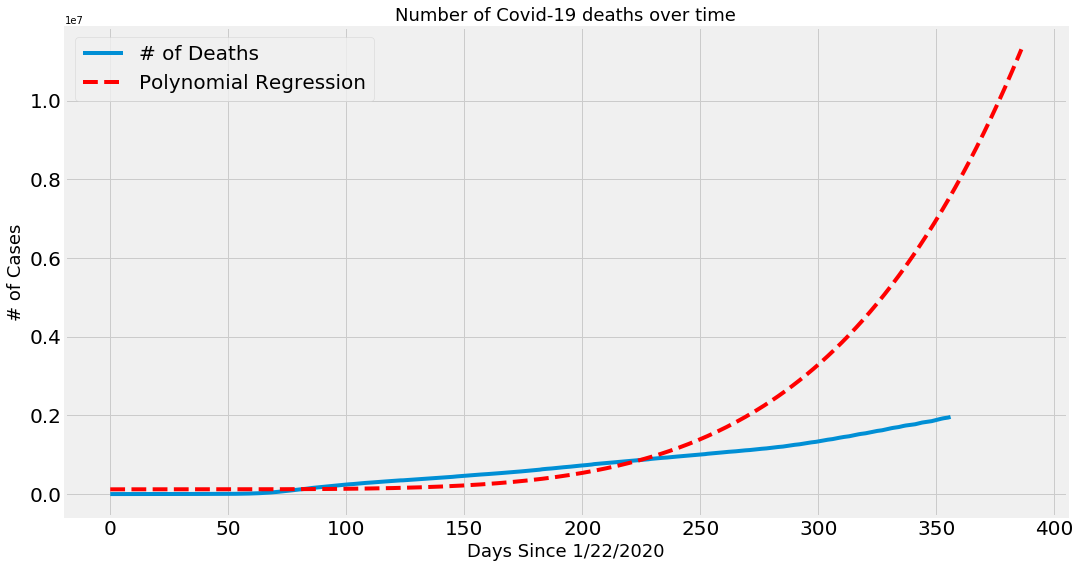

In [62]:
plot_predictions_deaths(adjusted_dates,total_deaths, svm_pred_death, 'SVM','red')